In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset from CSV file
projectPath_save = "./save/"
projectPath = "./data/"
file_path = projectPath+ "timeVideo4.csv"

In [ ]:
df = pd.read_csv(file_path)
df

,TIME,behaviour
0,00:00:00,NaN
1,00:00:15,NaN
2,00:00:30,NaN
3,00:00:45,NaN
4,00:01:00,NaN
...,...,...
1323,05:30:45,LF
1324,05:31:00,LF
1325,05:31:15,LF
1326,05:31:30,LF


In [ ]:
df = df.dropna()
df

,TIME,behaviour
8,00:02:00,FAN
9,00:02:15,FAN
10,00:02:30,FAN
11,00:02:45,FAN
12,00:03:00,FAN
...,...,...
1323,05:30:45,LF
1324,05:31:00,LF
1325,05:31:15,LF
1326,05:31:30,LF


In [ ]:
#Counting the number of frames per behaviour

beh = df.groupby("behaviour").size()
beh

,0
behaviour,
AM,6
BEND,83
BK_SW,31
BN,39
CHASE_FLEE,7
DAN_CIRC,89
FAN,194
GB,31
INS,11


In [ ]:
total_frames = int(len(df))
total_frames

961

In [ ]:
perc_frames = beh/total_frames*100
perc_frames

,0
behaviour,
AM,0.624350
BEND,8.636837
BK_SW,3.225806
BN,4.058273
CHASE_FLEE,0.728408
DAN_CIRC,9.261186
FAN,20.187305
GB,3.225806
INS,1.144641


In [ ]:
perc_frames.info()

<class 'pandas.core.series.Series'>
Index: 17 entries, AM to SPA
Series name: None
Non-Null Count  Dtype  
--------------  -----  
17 non-null     float64
dtypes: float64(1)
memory usage: 828.0+ bytes


Text(0, 0.5, '% of frames')

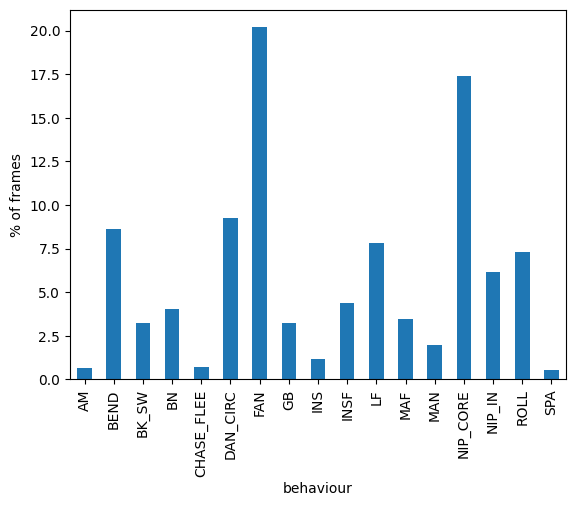

In [ ]:
#Explorative bar plot
perc_frames.plot.bar().set_ylabel('% of frames')

In [ ]:
# Define the categories
Courtship_all = ['BEND', 'DAN_CIRC', 'ROLL', 'GB', 'LF', 'BK_SW', 'BEND_OPP', 'H_DOWN', 'H_UP', 'MAF', 'UP', 'SPA']
Nest_mantainance = ['SA', 'NIP_OUT', 'NIP_IN', 'BN', 'AM', 'LAND', 'MAN' ]
Egg_care = ['FAN', 'NIP_CORE', 'INSF']
Agonism = ['CHASE_FLEE']

In [ ]:
# Define dictionary behaviour:category
behavior_to_type_map = {
    'BEND': 'Courtship', 'DAN_CIRC' : 'Courtship', 'ROLL': 'Courtship', 'GB': 'Courtship',
    'LF' : 'Courtship', 'BK_SW' : 'Courtship', 'BEND_OPP' : 'Courtship', 'H_DOWN' : 'Courtship',
    'H_UP' : 'Courtship', 'MAF' : 'Courtship', 'UP' : 'Courtship', 'SA' : 'Nest_mantainance', 'NIP_OUT' : 'Nest_mantainance', 'NIP_IN' : 'Nest_mantainance',
    'BN' : 'Nest_mantainance', 'AM' : 'Nest_mantainance', 'LAND' : 'Nest_mantainance', 'MAN' : 'Nest_mantainance',
    'FAN' : 'Egg_care', 'SPA' : 'Courtship', 'NIP_CORE' : 'Egg_care', 'INSF' : 'Egg_care',
    'CHASE_FLEE' : 'Agonism'
}

In [ ]:
#series to datarfame
dfperc_frames = pd.DataFrame(perc_frames)

In [ ]:
# Add column "Group" using the dictionary
dfperc_frames['Group'] = dfperc_frames.index.map(behavior_to_type_map)

In [ ]:
# Remove behaviours not in categories
prova = dfperc_frames.dropna()

In [ ]:
prova.columns = ['%', 'Group']

In [ ]:
# Map of colors per category
color_map = {
    'Egg_care': 'blue',
    'Nest_mantainance': 'green',
    'Courtship': 'pink',
    'Agonism': 'purple'
}

In [ ]:
#apply the map of colors to the column Group
colors = prova['Group'].map(color_map)

In [ ]:
#sort values
df_sorted = prova.sort_values(by=['Group','%'], ascending=[True, False])
df_sorted

,%,Group
behaviour,,
CHASE_FLEE,0.728408,Agonism
DAN_CIRC,9.261186,Courtship
BEND,8.636837,Courtship
LF,7.804370,Courtship
ROLL,7.284079,Courtship
MAF,3.433923,Courtship
BK_SW,3.225806,Courtship
GB,3.225806,Courtship
SPA,0.520291,Courtship


In [ ]:
#apply the color map to the colomn Group
bar_colors = df_sorted['Group'].map(color_map)

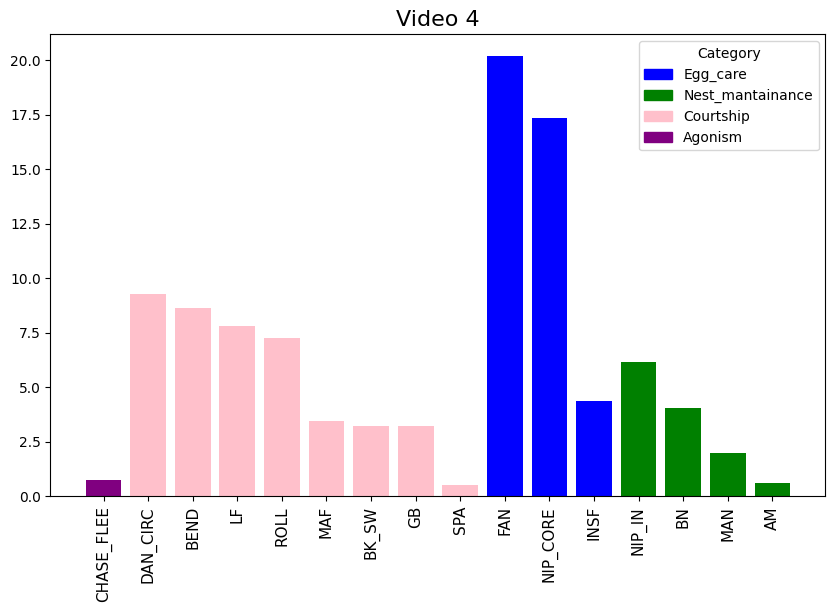

In [ ]:
#Create graph

plt.figure(figsize=(10, 6))
plt.bar(df_sorted.index, df_sorted['%'], color=bar_colors)

# Rotate ticks 90 degrees)
plt.xticks(rotation=90, fontsize=11)


plt.title('Video 4', fontsize=16)


handles = [plt.Rectangle((0,0),1,1, color=color_map[tipo]) for tipo in color_map]
labels = color_map.keys()
plt.legend(handles, labels, title='Category')

#save
plt.savefig(projectPath_save + 'timeBudgetV4.png')
plt.savefig(projectPath_save + 'timeBudgetV4.svg')

plt.show()

In [ ]:
#summing categories
group_perc = prova.groupby('Group')['%'].sum()

In [ ]:
group_perc

,%
Group,
Agonism,0.728408
Courtship,43.392300
Egg_care,41.935484
Nest_mantainance,12.799168


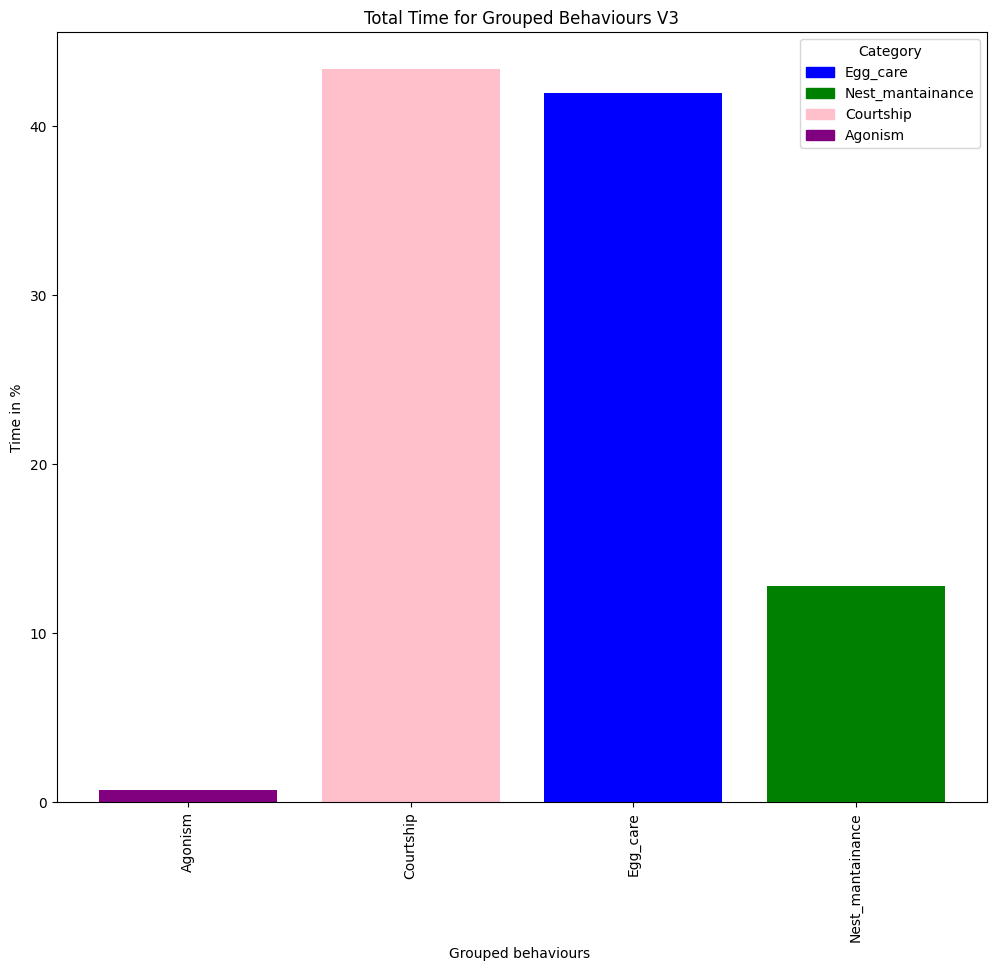

In [ ]:
# Graph

colori_barre = ['purple', 'pink', 'blue', 'green']

plt.figure(figsize=(12, 10))
plt.bar(group_perc.index, group_perc.values, color = colori_barre) # Use .values to access the summed values

plt.xticks(rotation=90)

plt.xlabel('Grouped behaviours ')
plt.ylabel('Time in %')
plt.title('Total Time for Grouped Behaviours V4')


handles = [plt.Rectangle((0,0),1,1, color=color_map[tipo]) for tipo in color_map]
labels = color_map.keys()
plt.legend(handles, labels, title='Category')
plt.savefig(projectPath_save + 'timeBudgetGroupedSumPercV4.png')

plt.show()
